In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
animex = pd.read_excel(r"C:\Users\PANKAJ GUPTA\Downloads\Animex.xlsx",header =1)
animey = pd.read_excel(r"C:\Users\PANKAJ GUPTA\Downloads\Anime y.xlsx",header=1)

In [62]:
animex.head(2)

,Anime ID,Producers,Title,Type,Studio,Source,A/R Ratings,Members,Favorites,Episodes,...,platform2,Platform_count,Production_Budget_in _mn,Streaming_Cost_in _mn,Merchandise_revenue_in _bn,Streaming_revenues_bn,Total revenues_in _bn,profit_in _bn,revenue/hr_in_mn,watchour/Day
0,63980,Kodansha,Song blood,OVA,Ufotable,Game,PG-13,838469.0,47551,7,...,NaN,1,2102.8334,101.099251,7.662497e+05,5.373901e+06,9.080433e+06,9.080431e+06,51.174917,2.282836e+06
1,298134,"TV Tokyo, Kodansha",Response per like,OVA,Wit Studio,Light Novel,PG,861312.0,10917,472,...,NaN,1,4127.4346,101.551329,4.765198e+07,1.947631e+07,3.373320e+07,3.373319e+07,582.755854,1.012146e+04


In [15]:
animey.head(2)

,Anime ID,Producers,Title,Type,Studio,Source,A/R Ratings,Members,Favorites,Episodes,...,engagement_index,Extracted_platforms,Platform_count,Production_Budget_in _mn,Streaming_Cost_in _mn,Merchandise_revenue_in _bn,Streaming_revenues_bn,Total revenues_in _bn,profit_in _bn,revenue/hr_in_mn
0,228365,Shueisha,Police adult public,OVA,Toei Animation,Light Novel,R,784984.0,11768,35,...,1.121261,"Crunchyroll, Apple TV, HBO Max",3,1771.7798,463.720569,3.933008e+05,7.651389e+06,1.267190e+07,1.267190e+07,1786.277527
1,29388,"Kodansha, Bandai Namco",Cup choose,ONA,MAPPA,Light Novel,PG,785465.0,50,6,...,112.160000,"Netflix, Apple TV",2,5817.1548,394.799852,1.066354e+07,6.514198e+00,1.164999e+06,1.164992e+06,0.001362


# Anime X

In [63]:
animex.shape

(1482, 38)

In [64]:
animex = animex[animex['Type'] != 'TV']

# Genre Analysis

In [67]:
genre = animex.groupby('genre1')

In [68]:
animex.groupby('genre1')['Watch Hours'].sum().sort_values(ascending=False)

genre1
Romance          6628727683
Action           6521223961
Sci-Fi           5873988951
Fantasy          5765570016
Drama            5357783589
Supernatural     5348239394
Slice of Life    5297088348
Mystery          5212680861
Horror           4973327963
Comedy           4932765467
Adventure        4357739911
Name: Watch Hours, dtype: int64

In [69]:
animex.groupby('genre1')['Watch Hours'].mean().astype(int).sort_values(ascending=False)

genre1
Action           58749765
Fantasy          58238080
Sci-Fi           57029018
Romance          56655792
Comedy           56054153
Drama            55810245
Supernatural     55710827
Slice of Life    54051921
Adventure        52502890
Mystery          51610701
Horror           49733279
Name: Watch Hours, dtype: int32

In [72]:
g1=genre.agg(
    {
        'Members':'mean',
        'Favorites':'mean',
        'User_Reviews':'mean',
        'Score ':'mean',
        'Countries_available':'mean',
        'awards_won':'sum',
        'aired_days':'mean',
        'Anime ID':'count',
        'Episodes':'mean',
        'watchour/Day':'mean'
    }
).round(1)
g1

,Members,Favorites,User_Reviews,Score,Countries_available,awards_won,aired_days,Anime ID,Episodes,watchour/Day
genre1,,,,,,,,,,
Action,807824.6,26871.7,9916.9,8.8,7.6,725,1471.6,111,101.9,450457.7
Adventure,811216.2,26944.8,10149.6,8.7,7.3,535,1724.6,83,69.5,406426.6
Comedy,800498.7,31198.4,10107.4,8.8,7.4,581,2104.4,88,92.5,502269.2
Drama,798935.0,30120.9,9264.6,8.5,7.4,631,3162.2,96,103.4,216820.7
Fantasy,791868.3,28670.3,9492.2,8.8,7.6,636,1547.4,99,112.7,211001.3
Horror,799429.1,26595.0,9495.2,8.8,6.6,667,1341.6,100,76.0,263026.9
Mystery,815042.5,30546.3,9906.5,8.7,7.5,633,2401.5,101,88.8,222778.7
Romance,795606.4,27579.9,9647.4,8.7,7.7,761,1960.9,117,86.3,380538.6
Sci-Fi,800236.9,27320.5,9751.1,8.7,7.0,660,1518.0,103,80.9,294710.4


In [136]:
CoV= g1.std() / g1.mean() * 100
print(CoV) #in %

Members                 1.405483
Favorites               5.963455
User_Reviews            2.860230
Score                   1.125980
Countries_available     4.586478
awards_won              9.584814
aired_days             28.928146
Anime ID                9.471981
Episodes               14.426448
watchour/Day           32.506530
dtype: float64


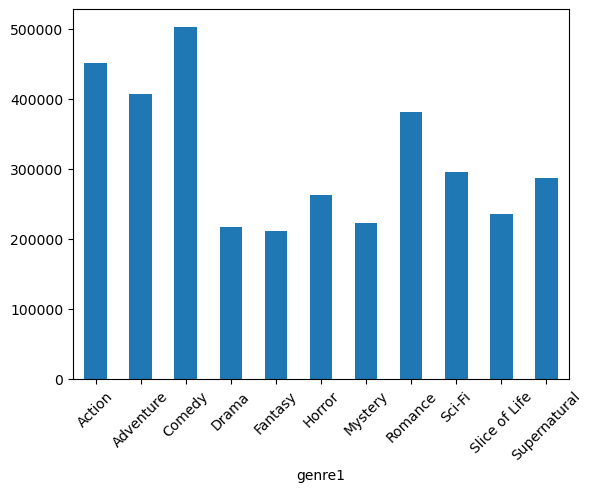

In [128]:
g1['watchour/Day'].plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [86]:
g2=genre.agg(
    {
        'Streaming_Cost_in _mn':'mean',
        'Streaming_revenues_bn':'mean',
        'revenue/hr_in_mn':'mean',
        'watchour/Day':'mean'
    }
).round(1) 
g2

,Streaming_Cost_in _mn,Streaming_revenues_bn,revenue/hr_in_mn,watchour/Day
genre1,,,,
Action,421.0,8086428.3,242.6,450457.7
Adventure,417.5,7534083.3,326.0,406426.6
Comedy,430.0,6780815.4,249.9,502269.2
Drama,405.6,8841989.3,256.6,216820.7
Fantasy,400.7,8440624.5,195.7,211001.3
Horror,429.7,6191299.1,250.5,263026.9
Mystery,422.8,5986727.8,354.0,222778.7
Romance,398.0,8521582.8,286.0,380538.6
Sci-Fi,411.7,6395057.3,264.6,294710.4


In [85]:
Std= g2.std().astype('int')
CoV= g2.std() / g2.mean() * 100
print(Std)
print(CoV) #in %

Streaming_Cost_in _mn         11
Streaming_revenues_bn    1142694
revenue/hr_in_mn              52
watchour/Day              102565
dtype: int32
Streaming_Cost_in _mn     2.806386
Streaming_revenues_bn    15.871916
revenue/hr_in_mn         20.345176
watchour/Day             32.506530
dtype: float64


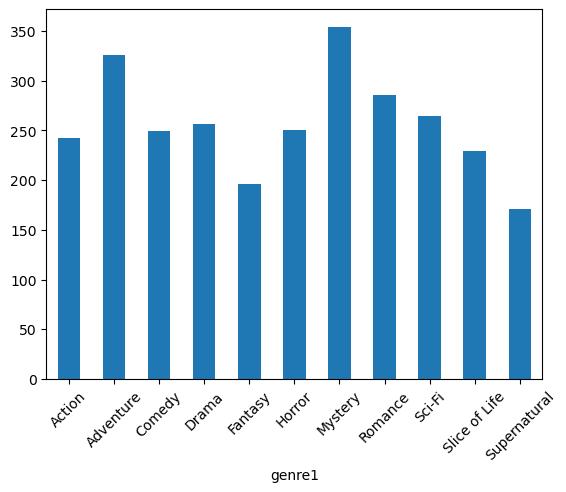

In [134]:
g2['revenue/hr_in_mn'].plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

# type analysis

In [87]:
type = animex.groupby('Type')

In [88]:
t1=type.agg(
    {
        'Members':'mean',
        'Favorites':'mean',
        'User_Reviews':'mean',
        'Score ':'mean',
        'Countries_available':'mean',
        'awards_won':'sum',
        'aired_days':'mean',
        'Anime ID':'count',
        'Episodes':'mean',
        'watchour/Day':'mean',
        'Watch Hours':'mean'
    }
).round(1)
t1

,Members,Favorites,User_Reviews,Score,Countries_available,awards_won,aired_days,Anime ID,Episodes,watchour/Day,Watch Hours
Type,,,,,,,,,,,
ONA,802524.9,28113.5,9651.1,8.8,7.5,2377,1609.7,375,82.2,380036.8,53534946.6
OVA,795687.5,27627.9,9789.7,8.6,7.4,2423,2121.4,371,94.6,282871.5,55361402.2
Special,799213.8,28707.3,9843.6,8.7,7.2,2278,2040.3,346,93.2,278939.9,56804771.6


In [135]:
CoV= t1.std() / t1.mean() * 100
print(CoV)

Members                 0.427867
Favorites               1.920467
User_Reviews            1.017338
Score                   1.149425
Countries_available     2.073564
awards_won              3.140581
aired_days             14.295893
Anime ID                4.317647
Episodes                7.545745
watchour/Day           18.240875
Watch Hours             2.966754
dtype: float64


<Axes: xlabel='Type'>

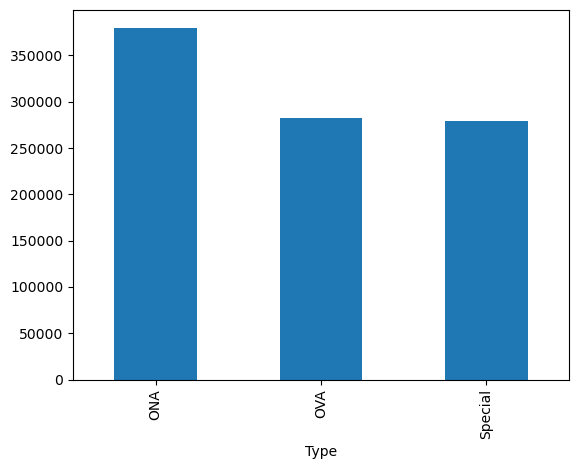

In [137]:
t1['watchour/Day'].plot(kind='bar')

In [89]:
t2=type.agg(
    {
        'Streaming_Cost_in _mn':'mean',
        'Streaming_revenues_bn':'mean',
        'revenue/hr_in_mn':'mean',
        'watchour/Day':'mean'
    }
).round(1) 
t2

,Streaming_Cost_in _mn,Streaming_revenues_bn,revenue/hr_in_mn,watchour/Day
Type,,,,
ONA,411.2,7587570.5,256.9,380036.8
OVA,417.8,7146513.0,235.3,282871.5
Special,419.3,6914879.4,279.6,278939.9


In [92]:
Std= t2.std().astype('int')
CoV= t2.std() / t2.mean() * 100
print(Std)
print(CoV) 

Streaming_Cost_in _mn         4
Streaming_revenues_bn    341735
revenue/hr_in_mn             22
watchour/Day              57267
dtype: int32
Streaming_Cost_in _mn     1.035639
Streaming_revenues_bn     4.735593
revenue/hr_in_mn          8.610628
watchour/Day             18.240875
dtype: float64


# platform analysis

In [98]:
platform = animex.groupby('platform1')

In [99]:
p1=platform.agg(
    {
        'Members':'mean',
        'Favorites':'mean',
        'User_Reviews':'mean',
        'Score ':'mean',
        'Countries_available':'mean',
        'awards_won':'sum',
        'aired_days':'mean',
        'Anime ID':'count',
        'Episodes':'mean',
        'watchour/Day':'mean',
        'Watch Hours':'mean'
    }
).round(1)
p1

,Members,Favorites,User_Reviews,Score,Countries_available,awards_won,aired_days,Anime ID,Episodes,watchour/Day,Watch Hours
platform1,,,,,,,,,,,
Apple TV,789800.6,28664.5,9497.7,8.8,7.5,728,1611.1,113,92.2,343947.7,58707557.2
Crunchyroll,812237.1,27170.7,9689.8,8.7,7.4,637,2020.7,103,82.9,282634.0,50972576.0
Disney,808711.8,30380.0,9628.2,8.7,7.9,686,1726.1,107,104.5,370921.0,57760799.4
Funimation,791172.8,27953.6,9715.0,8.7,7.0,770,1757.7,119,90.7,200136.0,50219740.6
HBO Max,814399.6,26879.5,9734.9,8.6,8.2,733,2117.6,115,95.7,307924.4,57875237.7
Hulu,790768.1,27779.9,9654.1,8.8,7.2,795,1738.8,125,75.1,296579.2,54281670.1
Netflix,802542.4,27907.4,10010.6,8.7,7.3,713,3203.9,108,71.3,497117.5,58538513.2
Tubi,788313.3,29271.1,10180.0,8.7,6.9,727,1901.6,110,92.3,263902.3,54055909.1
YouTube,798478.0,26735.4,9573.4,8.7,7.3,661,1877.9,99,111.4,204372.8,55022850.0


In [100]:
CoV= p1.std() / p1.mean() * 100
print(CoV)

Members                 1.284632
Favorites               4.225030
User_Reviews            2.226034
Score                   0.689838
Countries_available     5.581562
awards_won              6.956132
aired_days             24.046574
Anime ID                7.221270
Episodes               14.215591
watchour/Day           29.561440
Watch Hours             5.791688
dtype: float64


<Axes: xlabel='platform1'>

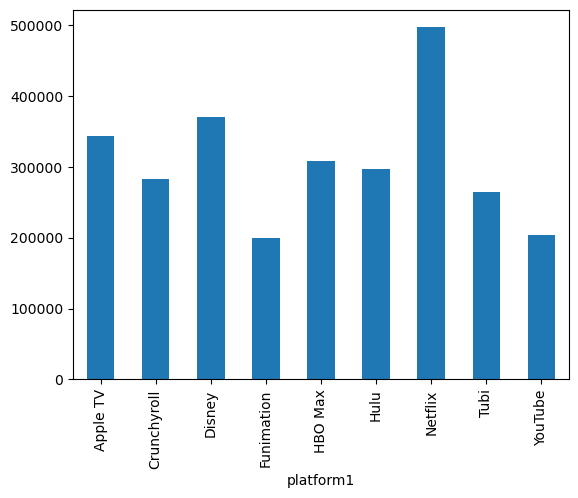

In [141]:
p1['watchour/Day'].plot(kind='bar')

In [101]:
p2=platform.agg(
    {
        'Streaming_Cost_in _mn':'mean',
        'Streaming_revenues_bn':'mean',
        'revenue/hr_in_mn':'mean',
        'watchour/Day':'mean'
    }
).round(1) 
p2

,Streaming_Cost_in _mn,Streaming_revenues_bn,revenue/hr_in_mn,watchour/Day
platform1,,,,
Apple TV,415.1,7918214.4,233.3,343947.7
Crunchyroll,415.2,7254481.9,269.5,282634.0
Disney,432.7,6897525.8,255.1,370921.0
Funimation,419.3,7841107.1,375.0,200136.0
HBO Max,402.7,8599347.9,305.3,307924.4
Hulu,424.4,5724073.0,253.3,296579.2
Netflix,424.6,6591288.6,194.3,497117.5
Tubi,423.5,6027427.6,201.9,263902.3
YouTube,417.4,7320354.5,238.0,204372.8


In [102]:
CoV= p2.std() / p2.mean() * 100
print(CoV)

Streaming_Cost_in _mn     2.003199
Streaming_revenues_bn    13.000237
revenue/hr_in_mn         21.328945
watchour/Day             29.561440
dtype: float64


<Axes: xlabel='platform1'>

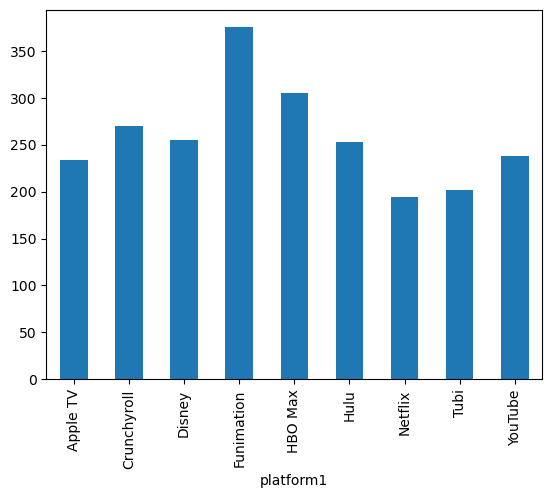

In [142]:
p2['revenue/hr_in_mn'].plot(kind='bar')

In [96]:
numeric_columns = animex.select_dtypes(include=['number'])
CoV = numeric_columns.std() / numeric_columns.mean() * 100
print(CoV)

Anime ID                        44.710171
Members                         14.809199
Favorites                       50.486770
Episodes                       124.156500
Duration                        37.702262
Watch Hours                     62.110546
User_Reviews                    29.288700
Score                           15.988834
Countries_available             55.049480
awards_won                      20.309695
aired_days                     262.009349
no_of_time_watched             281.440755
genre_count                     40.233666
release_frequency              642.451633
watch_hour_per_member           64.778851
engagement_index              1263.875256
Platform_count                  34.406967
Production_Budget_in _mn        74.801237
Streaming_Cost_in _mn           30.737582
Merchandise_revenue_in _bn     119.852477
Streaming_revenues_bn          130.148694
Total revenues_in _bn           69.950240
profit_in _bn                   69.950295
revenue/hr_in_mn               219

# ar rating analysis

In [104]:
rating = animex.groupby('A/R Ratings')

In [105]:
r1=rating.agg(
    {
        'Members':'mean',
        'Favorites':'mean',
        'User_Reviews':'mean',
        'Score ':'mean',
        'Countries_available':'mean',
        'awards_won':'sum',
        'aired_days':'mean',
        'Anime ID':'count',
        'Episodes':'mean',
        'watchour/Day':'mean',
        'Watch Hours':'mean'
    }
).round(1)
r1

,Members,Favorites,User_Reviews,Score,Countries_available,awards_won,aired_days,Anime ID,Episodes,watchour/Day,Watch Hours
A/R Ratings,,,,,,,,,,,
PG,803020.4,28628.6,9724.1,8.8,7.2,2683,1533.7,413,83.8,364730.7,53413318.2
PG-13,795358.8,27289.2,9695.4,8.7,7.3,2235,1760.4,346,88.1,272405.1,55262526.0
R,798298.2,28407.0,9868.9,8.7,7.7,2160,2564.9,333,99.3,297556.7,57323128.4


In [106]:
CoV= r1.std() / r1.mean() * 100
print(CoV)

Members                 0.483822
Favorites               2.554174
User_Reviews            0.952586
Score                   0.661088
Countries_available     3.575340
awards_won             11.986474
aired_days             27.747473
Anime ID               11.794004
Episodes                8.851631
watchour/Day           15.319504
Watch Hours             3.534704
dtype: float64


In [107]:
r2=rating.agg(
    {
        'Streaming_Cost_in _mn':'mean',
        'Streaming_revenues_bn':'mean',
        'revenue/hr_in_mn':'mean',
        'watchour/Day':'mean'
    }
).round(1) 
r2

,Streaming_Cost_in _mn,Streaming_revenues_bn,revenue/hr_in_mn,watchour/Day
A/R Ratings,,,,
PG,415.1,7398408.4,261.6,364730.7
PG-13,412.6,7410716.6,249.9,272405.1
R,420.7,6815594.4,257.8,297556.7


In [114]:
CoV= r2.std() / r2.mean() * 100
print(CoV)

Streaming_Cost_in _mn     0.996721
Streaming_revenues_bn     4.718164
revenue/hr_in_mn          2.327517
watchour/Day             15.319504
dtype: float64


# day wise

In [109]:
day = animex.groupby('Broadcast_Day')

In [110]:
d1=day.agg(
    {
        'Members':'mean',
        'Favorites':'mean',
        'User_Reviews':'mean',
        'Score ':'mean',
        'Countries_available':'mean',
        'awards_won':'sum',
        'aired_days':'mean',
        'Anime ID':'count',
        'Episodes':'mean',
        'watchour/Day':'mean',
        'Watch Hours':'mean'
    }
).round(1)
d1

,Members,Favorites,User_Reviews,Score,Countries_available,awards_won,aired_days,Anime ID,Episodes,watchour/Day,Watch Hours
Broadcast_Day,,,,,,,,,,,
Friday,789053.1,30152.1,9470.0,8.7,7.6,943,1961.5,145,89.4,415134.8,56478731.8
Monday,816201.3,29376.0,9739.1,8.8,7.8,994,1487.5,156,85.0,330930.5,54047437.8
Saturday,790690.8,26853.8,9323.5,8.7,7.4,1008,1840.8,157,81.4,297152.9,51525960.4
Sunday,794702.6,25953.8,9652.6,8.7,7.2,1126,2191.6,173,106.0,343974.8,55838515.7
Thursday,801162.0,27790.1,10113.1,8.8,7.0,946,1802.4,145,80.9,347936.6,54598386.5
Tuesday,793972.5,28075.3,9863.1,8.7,7.7,1067,1934.0,163,95.8,264915.3,61369795.2
Wednesday,808671.6,29141.5,10175.1,8.6,7.0,994,2192.3,153,87.9,211503.0,52147961.2


In [111]:
CoV= d1.std() / d1.mean() * 100
print(CoV)

Members                 1.256986
Favorites               5.245449
User_Reviews            3.223513
Score                   0.791879
Countries_available     4.451545
awards_won              6.484780
aired_days             12.730375
Anime ID                6.356613
Episodes                9.935971
watchour/Day           20.730522
Watch Hours             5.949952
dtype: float64


<Axes: xlabel='Broadcast_Day'>

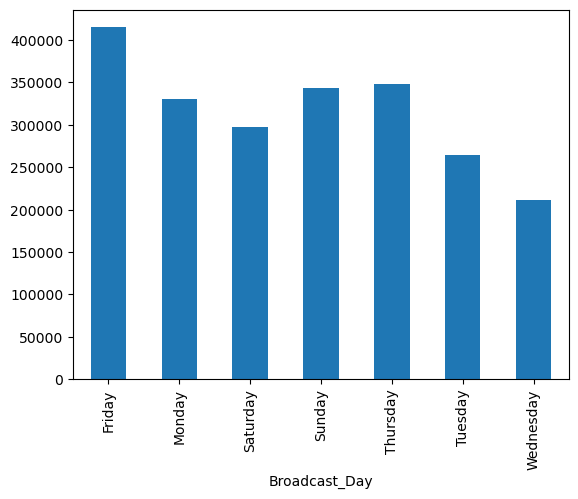

In [145]:
d2['watchour/Day'].plot(kind='bar')

In [112]:
d2=day.agg(
    {
        'Streaming_Cost_in _mn':'mean',
        'Streaming_revenues_bn':'mean',
        'revenue/hr_in_mn':'mean',
        'watchour/Day':'mean'
    }
).round(1) 
d2

,Streaming_Cost_in _mn,Streaming_revenues_bn,revenue/hr_in_mn,watchour/Day
Broadcast_Day,,,,
Friday,405.3,8386590.0,264.5,415134.8
Monday,432.8,7117308.9,292.1,330930.5
Saturday,417.2,7306930.8,286.0,297152.9
Sunday,421.2,7144316.9,217.8,343974.8
Thursday,417.1,7598861.4,249.1,347936.6
Tuesday,405.7,6134030.9,169.0,264915.3
Wednesday,411.9,7046084.2,328.0,211503.0


In [115]:
CoV= d2.std() / d2.mean() * 100
print(CoV)

Streaming_Cost_in _mn     2.300525
Streaming_revenues_bn     9.311113
revenue/hr_in_mn         20.323375
watchour/Day             20.730522
dtype: float64


<Axes: xlabel='Broadcast_Day'>

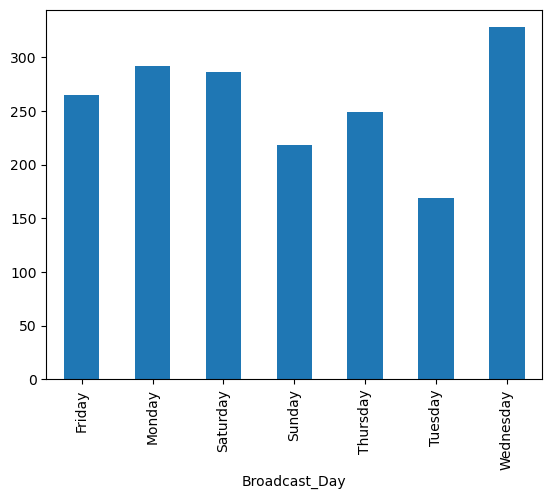

In [146]:
d2['revenue/hr_in_mn'].plot(kind='bar')

In [116]:
dub = animex.groupby('Dub Availability')

In [117]:
b1=dub.agg(
    {
        'Members':'mean',
        'Favorites':'mean',
        'User_Reviews':'mean',
        'Score ':'mean',
        'Countries_available':'mean',
        'awards_won':'sum',
        'aired_days':'mean',
        'Anime ID':'count',
        'Episodes':'mean',
        'watchour/Day':'mean',
        'Watch Hours':'mean'
    }
).round(1)
b1

,Members,Favorites,User_Reviews,Score,Countries_available,awards_won,aired_days,Anime ID,Episodes,watchour/Day,Watch Hours
Dub Availability,,,,,,,,,,,
No,797972.9,27956.2,9799.2,8.7,7.3,2465,1909.3,382,91.3,276185.4,55766049.3
Partial,798254.2,28824.3,9898.9,8.8,7.8,2361,1846.9,362,84.1,399107.6,56599743.8
Yes,801382.8,27619.4,9569.9,8.6,7.1,2252,2007.8,348,94.4,270093.5,53095971.5


In [119]:
CoV= b1.std() / b1.mean() * 100
print(CoV)

Members                 0.236828
Favorites               2.209718
User_Reviews            1.729200
Score                   1.149425
Countries_available     4.872367
awards_won              4.514402
aired_days              4.222180
Anime ID                4.694508
Episodes                5.875745
watchour/Day           23.098966
Watch Hours             3.318597
dtype: float64


In [120]:
b2=dub.agg(
    {
        'Streaming_Cost_in _mn':'mean',
        'Streaming_revenues_bn':'mean',
        'revenue/hr_in_mn':'mean',
        'watchour/Day':'mean'
    }
).round(1) 
b2

,Streaming_Cost_in _mn,Streaming_revenues_bn,revenue/hr_in_mn,watchour/Day
Dub Availability,,,,
No,415.8,7350239.4,249.2,276185.4
Partial,425.8,6437665.4,223.4,399107.6
Yes,406.1,7905221.9,299.8,270093.5


In [121]:
CoV= b2.std() / b2.mean() * 100
print(CoV)

Streaming_Cost_in _mn     2.368449
Streaming_revenues_bn    10.247537
revenue/hr_in_mn         15.095183
watchour/Day             23.098966
dtype: float64


# monte carlo 

In [151]:
budget_X = 7000  
num_simulations = 1000

In [156]:
def monte_carlo_animeX(animex, budget, num_simulations):
    results = []
    
    for _ in range(num_simulations):
        sampled_animex = animex.sample(frac=1, replace=False).reset_index(drop=True)
        total_cost = 0
        selected_anime = []
        for _, row in sampled_animex.iterrows():
            if total_cost + row["Streaming_Cost_in _mn"] <= budget:
                selected_anime.append(row)
                total_cost += row["Streaming_Cost_in _mn"]
        selected_animex = pd.DataFrame(selected_anime)
        scenario_result = {
            "Sum_Streaming_Revenues_bn": selected_animex["Streaming_revenues_bn"].sum(),
            "Avg_Revenue_per_Hour_mn": selected_animex["revenue/hr_in_mn"].mean(),
            "Avg_Score": selected_animex["Score "].mean(),
            "Avg_Watch_Hour_per_Member": selected_animex["watch_hour_per_member"].mean(),
            "Avg_Members": selected_animex["Members"].mean(),
            "Total_Cost_mn": total_cost,
            "Selected_Anime_IDs": selected_animex["Anime ID"].tolist()
        }
        results.append(scenario_result)
    return pd.DataFrame(results)

In [157]:
results = monte_carlo_animeX(animex, budget_X, num_simulations)

In [161]:
results

,Sum_Streaming_Revenues_bn,Avg_Revenue_per_Hour_mn,Avg_Score,Avg_Watch_Hour_per_Member,Avg_Members,Total_Cost_mn,Selected_Anime_IDs
0,1.315037e+08,425.505405,8.558235,71.266745,783425.348825,6999.281255,"[140882, 181533, 173581, 77529, 200974, 198227..."
1,1.864424e+08,447.994673,8.293889,68.552276,780748.860116,6972.621532,"[92994, 282337, 200411, 260905, 187703, 228030..."
2,1.824190e+08,529.132928,9.185619,63.233780,775870.603861,6993.906765,"[95777, 204639, 165966, 103427, 241654, 171955..."
3,1.377162e+08,225.040179,8.827000,81.154267,776362.283553,6986.826815,"[275203, 134728, 139494, 154252, 132085, 6712,..."
4,9.877584e+07,191.960223,8.796911,66.994112,791018.891312,6977.037481,"[65301, 213038, 210381, 92723, 208051, 233552,..."
...,...,...,...,...,...,...,...
995,1.584382e+08,181.122736,8.844987,77.531418,798225.948347,6964.760973,"[252810, 155463, 260828, 170841, 202806, 21610..."
996,1.449435e+08,183.959233,9.050000,81.650612,842419.529412,6914.734015,"[63980, 68935, 221701, 83854, 281763, 188425, ..."
997,7.557925e+07,74.446937,9.011765,83.102451,755759.176471,6957.972158,"[260790, 102200, 160418, 203655, 247021, 20277..."
998,1.524749e+08,206.861994,8.431412,85.504494,746116.105266,6956.716954,"[49781, 292845, 20922, 244042, 185333, 147995,..."


In [170]:
import seaborn as sns
sns.set(style="whitegrid")

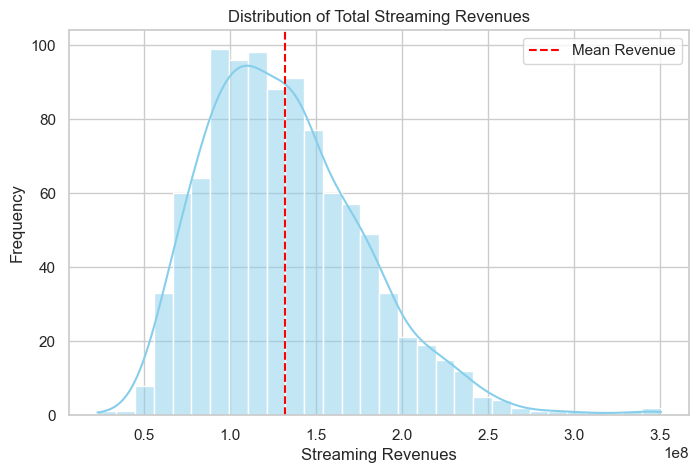

In [189]:
plt.figure(figsize=(8, 5))
sns.histplot(results["Sum_Streaming_Revenues_bn"], bins=30, kde=True, color="skyblue")
plt.axvline(results["Sum_Streaming_Revenues_bn"].mean(), color="red", linestyle="dashed", label="Mean Revenue")
plt.title("Distribution of Total Streaming Revenues")
plt.xlabel("Streaming Revenues")
plt.ylabel("Frequency")
plt.legend()
plt.show()

C:\Users\PANKAJ GUPTA\AppData\Local\Temp\ipykernel_22484\2404947498.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


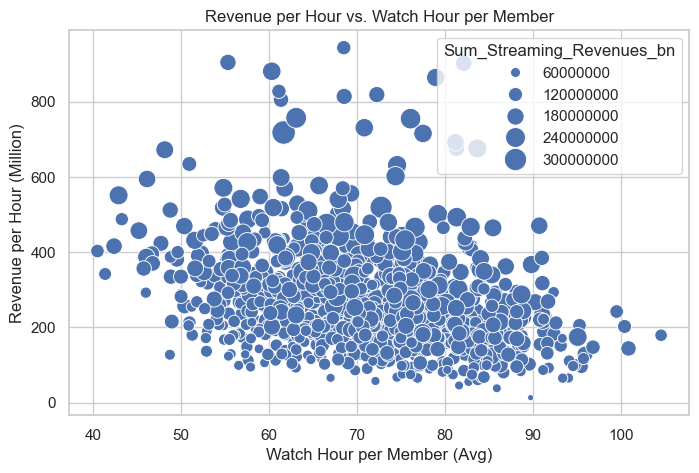

In [176]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=results["Avg_Watch_Hour_per_Member"], 
    y=results["Avg_Revenue_per_Hour_mn"], 
    size=results["Sum_Streaming_Revenues_bn"], 
    sizes=(20, 300), 
    palette="coolwarm"
)
plt.title("Revenue per Hour vs. Watch Hour per Member")
plt.xlabel("Watch Hour per Member (Avg)")
plt.ylabel("Revenue per Hour (Million)")
plt.show()

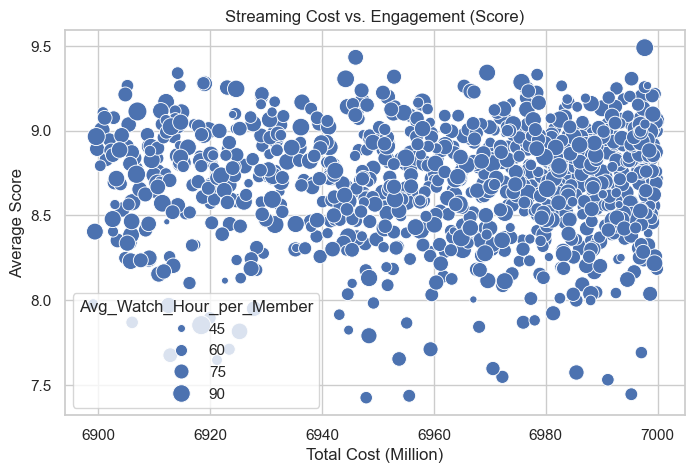

In [187]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=results["Total_Cost_mn"], 
    y=results["Avg_Score"], 
    size=results["Avg_Watch_Hour_per_Member"], 
    sizes=(20, 200)
)
plt.title("Streaming Cost vs. Engagement (Score)")
plt.xlabel("Total Cost (Million)")
plt.ylabel("Average Score")
plt.show()

# For Promoting Underrated Animes 

In [167]:
def monte_carlo_animeX(animex, budget, num_simulations):
    results1 = []
    
    for _ in range(num_simulations):
        filtered_animex = animex[(animex["Score "] >= 3.5) & (animex["Score "] <= 7)]
        sampled_animex = filtered_animex.sample(frac=1, replace=False).reset_index(drop=True)
        total_cost = 0
        selected_anime = []
        for _, row in sampled_animex.iterrows():
            if total_cost + row["Streaming_Cost_in _mn"] <= budget:
                selected_anime.append(row)
                total_cost += row["Streaming_Cost_in _mn"]
        
        selected_animex = pd.DataFrame(selected_anime)
        scenario_result = {
            "Sum_Streaming_Revenues_bn": selected_animex["Streaming_revenues_bn"].sum(),
            "Avg_Revenue_per_Hour_mn": selected_animex["revenue/hr_in_mn"].mean(),
            "Avg_Score": selected_animex["Score "].mean(),
            "Avg_Watch_Hour_per_Member": selected_animex["watch_hour_per_member"].mean(),
            "Avg_Members": selected_animex["Members"].mean(),
            "Total_Cost_mn": total_cost,
            "Selected_Anime_IDs": selected_animex["Anime ID"].tolist()
        }
        results1.append(scenario_result)
    return pd.DataFrame(results1)

In [168]:
results1 = monte_carlo_animeX(animex, budget_X, num_simulations)

In [169]:
results1

,Sum_Streaming_Revenues_bn,Avg_Revenue_per_Hour_mn,Avg_Score,Avg_Watch_Hour_per_Member,Avg_Members,Total_Cost_mn,Selected_Anime_IDs
0,2.255327e+08,1081.883574,5.668406,58.720260,748937.747876,6893.307936,"[291266, 88031, 109694, 70174, 126313, 216639,..."
1,1.586046e+08,820.730989,5.292034,69.097613,789812.835105,6920.205192,"[70174, 270149, 234277, 293668, 121423, 126313..."
2,8.775489e+07,339.865748,5.281656,64.107694,769897.088621,6977.726345,"[214154, 185985, 234277, 88031, 216639, 28545,..."
3,1.119586e+08,775.281040,5.045990,50.491194,798051.546035,6971.039667,"[126313, 222746, 223398, 166882, 74446, 70174,..."
4,1.740194e+08,1042.856442,5.371041,44.910196,789305.113276,6932.681335,"[88031, 185985, 7607, 279763, 70174, 123761, 2..."
...,...,...,...,...,...,...,...
995,1.153599e+08,781.376200,5.163153,58.874098,742468.741038,6976.476002,"[74446, 213038, 222746, 126313, 186073, 234277..."
996,1.294554e+08,296.446746,4.735551,60.486889,788699.618409,6952.175183,"[291266, 259807, 74446, 120754, 290465, 166882..."
997,1.775616e+08,913.845259,5.318333,78.619159,741329.671173,6950.234193,"[240261, 290465, 270149, 7607, 222746, 148114,..."
998,7.862252e+07,235.893424,4.859367,58.209596,763429.117177,6900.617733,"[2368, 121423, 291266, 185985, 212503, 216639,..."


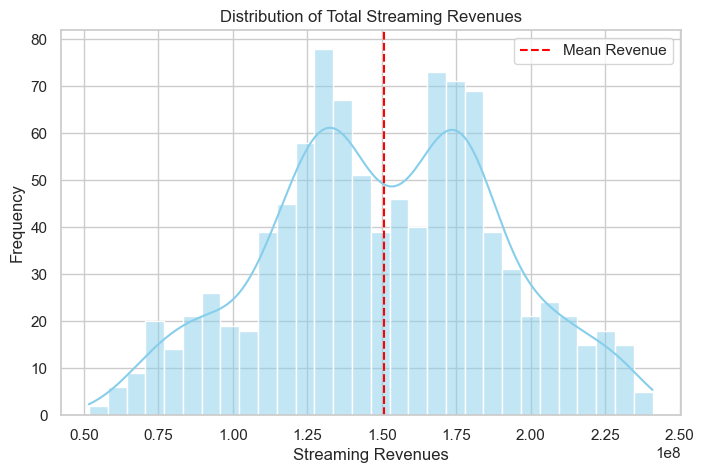

In [188]:
plt.figure(figsize=(8, 5))
sns.histplot(results1["Sum_Streaming_Revenues_bn"], bins=30, kde=True, color="skyblue")
plt.axvline(results1["Sum_Streaming_Revenues_bn"].mean(), color="red", linestyle="dashed", label="Mean Revenue")
plt.title("Distribution of Total Streaming Revenues")
plt.xlabel("Streaming Revenues")
plt.ylabel("Frequency")
plt.legend()
plt.show()

C:\Users\PANKAJ GUPTA\AppData\Local\Temp\ipykernel_22484\1933291380.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


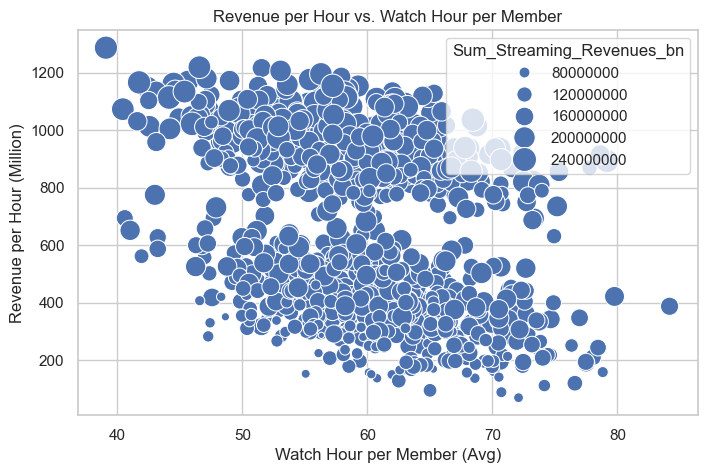

In [177]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=results1["Avg_Watch_Hour_per_Member"], 
    y=results1["Avg_Revenue_per_Hour_mn"], 
    size=results1["Sum_Streaming_Revenues_bn"], 
    sizes=(20, 300), 
    palette="coolwarm"
)
plt.title("Revenue per Hour vs. Watch Hour per Member")
plt.xlabel("Watch Hour per Member (Avg)")
plt.ylabel("Revenue per Hour (Million)")
plt.show()

C:\Users\PANKAJ GUPTA\AppData\Local\Temp\ipykernel_22484\2386421219.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


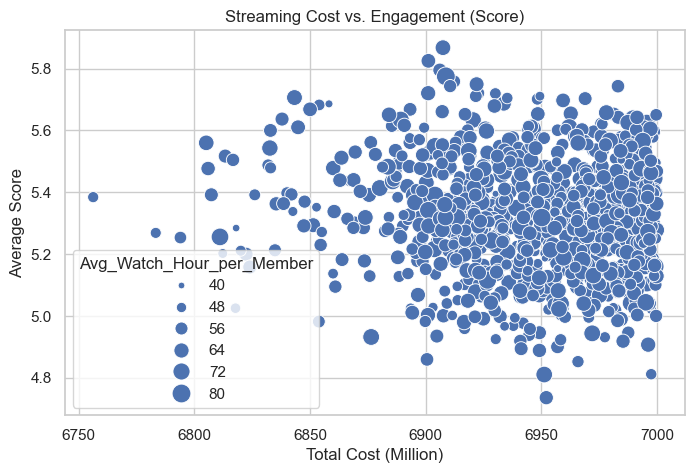

In [181]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=results1["Total_Cost_mn"], 
    y=results1["Avg_Score"], 
    size=results1["Avg_Watch_Hour_per_Member"], 
    sizes=(20, 200), 
    palette="viridis"
)
plt.title("Streaming Cost vs. Engagement (Score)")
plt.xlabel("Total Cost (Million)")
plt.ylabel("Average Score")
plt.show()

In [191]:
results.to_excel('animex_revenue.xlsx')

In [192]:
results1.to_excel('animex_market_promotion.xlsx')

In [1]:
import pandas as pd 

In [20]:
results = pd.read_excel(r"C:\Users\PANKAJ GUPTA\Downloads\archive (1)\DATA From Python\animex_revenue.xlsx")

In [21]:
results.columns

Index(['Index', 'Sum_Streaming_Revenues_bn', 'Avg_Revenue_per_Hour_mn',
       'Avg_Score', 'Avg_Watch_Hour_per_Member', 'Avg_Members',
       'Total_Streaming_Cost_mn', 'Anime Ids', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')

In [22]:
results = results.drop(['Index','Sum_Streaming_Revenues_bn','Avg_Revenue_per_Hour_mn','Avg_Score','Avg_Watch_Hour_per_Member','Avg_Members','Total_Streaming_Cost_mn'],axis=1)

In [23]:
all_ids = results.values.flatten()

In [24]:
all_ids

array([140882., 181533., 173581., ...,     nan,     nan,     nan])

In [25]:
id_counts = pd.Series(all_ids).value_counts()

In [26]:
id_counts

249117.0    46
63980.0     45
298134.0    40
93865.0     36
72996.0     34
            ..
101200.0     5
68676.0      5
103021.0     5
207217.0     5
219434.0     4
Name: count, Length: 1092, dtype: int64

<Axes: >

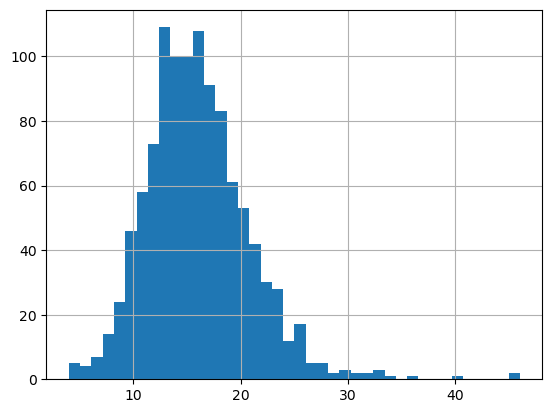

In [27]:
id_counts.hist(bins=40)

In [28]:
results1 = pd.read_excel(r"C:\Users\PANKAJ GUPTA\Downloads\archive (1)\DATA From Python\animex_market_promotion.xlsx")

In [29]:
results1.columns

Index(['index', 'Sum_Streaming_Revenues_bn', 'Avg_Revenue_per_Hour_mn',
       'Avg_Score', 'Avg_Watch_Hour_per_Member', 'Avg_Members',
       'Total_Cost_mn', 'Anime Ids', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [31]:
results1 = results1.drop(['index','Sum_Streaming_Revenues_bn','Avg_Revenue_per_Hour_mn','Avg_Score','Avg_Watch_Hour_per_Member','Avg_Members','Total_Cost_mn'],axis=1)

In [32]:
all_ids1 = results1.values.flatten()

In [33]:
id_counts1 = pd.Series(all_ids1).value_counts()

In [34]:
id_counts1

70174.0     616
185985.0    595
215647.0    573
186073.0    530
275203.0    492
270149.0    488
109694.0    468
126313.0    467
78514.0     458
65775.0     457
123761.0    456
28545.0     456
31798.0     448
279763.0    447
120754.0    447
213038.0    447
214154.0    446
171550.0    445
2368.0      445
148114.0    442
291266.0    442
216639.0    442
230128.0    441
7607.0      440
4554.0      438
166882.0    437
256566.0    432
234277.0    431
259807.0    429
293668.0    427
240261.0    423
93812.0     421
290465.0    420
223398.0    418
121423.0    417
222746.0    415
88031.0     414
74446.0     412
212503.0    411
Name: count, dtype: int64

<Axes: >

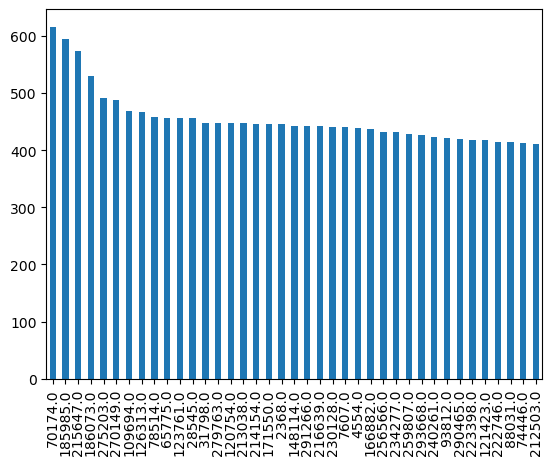

In [37]:
id_counts1.plot(kind='bar')

In [38]:
id_counts.to_excel('animex_id_count.xlsx')

In [39]:
id_counts1.to_excel('animex_id_count_market_promotion.xlsx')